# 필수 라이브러리 설치

아래 라이브러리를 <u>반드시 설치</u>하고 시험을 치릅니다.<br>
**gensim** 과 **numpy**의 버전 호환성 문제로 triu from 'scipy.linag' 오류가 날 수 있으니,<br>
requirements.txt에 있는 라이브러리만 설치합니다.

- pip install -r requirements.txt

![image.png](questions/Q1.png)

In [4]:
# 이곳에 코드를 작성하시오
from konlpy.tag import Okt

corpus = ''
with open('sample_corpus_hangul.txt', 'r', encoding='utf-8') as f:
    for line in f:
        corpus += line.strip()

In [6]:
# 1-1 
okt = Okt()
tokens_list = okt.morphs(corpus)
print(tokens_list)

# 1-2
print('토큰 전체 개수:', len(tokens_list))

['나랏말', '이', '중국', '과', '달라', '한자', '와', '서로', '통', '하지', '아니하므로', '우매', '한', '백성', '들', '이', '말', '하고', '싶은', '것', '이', '있어도', '마침내', '제', '뜻', '을', '잘', '표현', '하지', '못', '하는', '사람', '이', '많다', '.', '내', '이를', '딱하게', '여기어', '새로', '스물', '여덟', '자를', '만들었으니', '사람', '들', '로', '하여금', '쉬', '익히어', '날', '마다', '쓰는', '데', '편하게', '할', '뿐', '이다']
토큰 전체 개수: 58


![image.png](questions/Q2.png)

In [8]:
# 2
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = []
with open('sample_corpus.txt', 'r', encoding='utf-8') as f:
    for line in f:
        corpus.append(line.strip())
print(corpus)

['코로나 거리두기와 코로나 상생지원금 문의입니다.', '지하철 운행시간과 지하철 요금 문의입니다.', '지하철 승강장 문의입니다.', '코로나 선별진료소 문의입니다.', '버스 운행시간 문의입니다.', '버스 터미널 위치 안내입니다.', '코로나 거리두기 안내입니다.', '택시 승강장 문의입니다.']


In [9]:
tfidf = TfidfVectorizer(analyzer='word', max_features=5)
results  = tfidf.fit_transform(corpus)

vocab = tfidf.get_feature_names_out()
pd.DataFrame(results.toarray(), columns=vocab)

,문의입니다,버스,승강장,지하철,코로나
0,0.326550,0.000000,0.000000,0.000000,0.945180
1,0.285703,0.000000,0.000000,0.958318,0.000000
2,0.388500,0.000000,0.651563,0.651563,0.000000
3,0.568471,0.000000,0.000000,0.000000,0.822704
4,0.512131,0.858908,0.000000,0.000000,0.000000
5,0.000000,1.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,1.000000
7,0.512131,0.000000,0.858908,0.000000,0.000000


![image.png](questions/Q3.png)

In [11]:
# 3
df = pd.read_csv('ratings_train.txt', sep='\t').tail(100).reset_index(drop=True)

okt = Okt()
df['embedding'] = df['document'].apply(okt.nouns)
df

,id,document,label,embedding
0,9392240,진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...,0,"[진짜, 장면, 한번, 그, 하나, 귀신, 햇던]"
1,10141935,"너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...",0,"[끝, 배속, 보기, 안, 사람, 호기심, 가치, 강비, 추]"
2,9641183,설명은 줄이고 조율이 필요한 영화.,0,"[설명, 줄, 조율, 영화]"
3,10276386,이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다,0,"[베테, 백만, 나, 협심증]"
4,4403898,전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝,0,"[전형, 유치, 뽕짝, 프랑스, 영화, 장르, 유치, 뽕짝]"
...,...,...,...,...
95,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간, 문제, 소, 죄인]"
96,8549745,평점이 너무 낮아서...,1,[평점]
97,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이, 뭐, 한국인, 먹거리, 필리핀, 혼혈]"
98,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화, 최고봉, 방황, 날, 자화상]"


![image.png](questions/Q4.png)

In [12]:
# 4
from gensim.models import Word2Vec
import numpy as np

w2v = Word2Vec(sentences=df['embedding'], 
               vector_size=10, 
               min_count=1, 
               window=5, 
               sg=1)

In [13]:
embeddings_w2v = []

for token_list in df['embedding']:
    token_vectors = []
    for token in token_list:
        token_vectors.append(w2v.wv[token])
    embeddings_w2v.append(np.array(token_vectors))

df['embedding'] = embeddings_w2v
df

,id,document,label,embedding
0,9392240,진짜엄청재미없다 무서운장면은 딱한번나오고 그3초말고는 하나도안무섭고 지루하고 끝나고...,0,"[[0.07557218, -0.019882103, -0.041863266, 0.06..."
1,10141935,"너무 짜증나서, 끝은봐야해서 2배속빨리보기했다. 안본사람 호기심이라도 같지말길. 가...",0,"[[-0.07131933, 0.011671868, -0.07060782, -0.02..."
2,9641183,설명은 줄이고 조율이 필요한 영화.,0,"[[0.056597356, 0.05424719, 0.01937596, 0.05803..."
3,10276386,이야~~~40만 넘었내..베테랑은 9백만 넘었는데...나 협심증 걸렸다,0,"[[-0.044348698, -0.06259152, 0.09554746, -0.02..."
4,4403898,전형적인 유치뽕짝 프랑스영화 새로운장르다 유치뽕짝,0,"[[-0.08403921, -0.015367781, -0.025305228, 0.0..."
...,...,...,...,...
95,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[[0.006857192, -0.09226321, -0.09485956, -0.07..."
96,8549745,평점이 너무 낮아서...,1,"[[-0.072861925, -0.01454594, 0.102436885, -0.0..."
97,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[[0.054196857, 0.081992336, -0.01440321, -0.09..."
98,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[[-0.051638637, -0.075929135, -0.027410807, -0..."


![image.png](questions/Q5.png)

In [14]:
# 5.1
a = 'Hello World'
print(list(a+' 202')+['Hello there'])

['H', 'e', 'l', 'l', 'o', ' ', 'W', 'o', 'r', 'l', 'd', ' ', '2', '0', '2', 'Hello there']


In [15]:
# 5.2
d1 = {"David":25, 'Nami': 20, 'John':28}
d2 = {'Johnson':21, 'Ethan':30}

d1.update(d2)
print(d1)

{'David': 25, 'Nami': 20, 'John': 28, 'Johnson': 21, 'Ethan': 30}


![image.png](questions/Q6.png)

In [16]:
# 6
np.array([2,4,6,8,10])*2

array([ 4,  8, 12, 16, 20])

![image.png](questions/Q7.png)

In [17]:
# 7
df = pd.DataFrame(
    {'category':['A','B','A','B'],
    'Name':['John','Anna','Perter','Linda'],
    'Age': [28, 34, 45, 32],
    'Income': [50000, 60000, 80000, 75000]}
)

df.groupby('category')[['Age','Income']].mean()

,Age,Income
category,,
A,36.5,65000.0
B,33.0,67500.0


![image.png](questions/Q8.png)

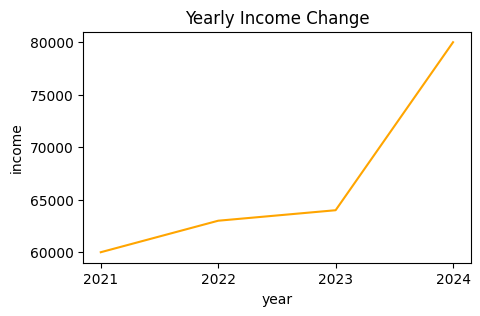

In [18]:
# 8
import matplotlib.pyplot as plt

year = ['2021', '2022', '2023', '2024']
income = [60000, 63000, 64000, 80000]

plt.figure(figsize=[5,3])
plt.plot(year, income, color='orange')
plt.title('Yearly Income Change')
plt.xlabel('year')
plt.ylabel('income')
plt.show()